# 📈 Chart 1: Rating Evolution Over Time (Stacked Area Chart)
# ------------------------------------------------------------
# This notebook shows how Netflix's target audience has changed over time,
# focusing on how the number of titles in different age categories evolved.

# 🧾 Section 1: Introduction
"""
Netflix began as a family-friendly platform, but over time, its content strategy
has matured. To explore this shift, we analyze how the number of titles in each
age rating category (e.g., TV-MA, PG, R) evolved from 2010 to 2024.
"""

In [16]:
# 📦 Section 2: Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

In [17]:
# 🎬 Section 3: Load and Inspect Data
df = pd.read_csv("../data/netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [18]:
# 🔍 Section 4: Preprocessing - Clean Ratings and Years
# Keep only rows with valid release years and ratings
df = df[df['release_year'].notna() & df['rating'].notna()]
df['release_year'] = df['release_year'].astype(int)

# Filter to focus on modern streaming years (e.g., 2010+)
df = df[df['release_year'] >= 2010]

In [19]:
# Simplify ratings to standard categories (group variations)
rating_map = {
'TV-G': 'G', 'G': 'G',
'TV-Y': 'G', 'TV-Y7': 'G',
'PG': 'PG', 'TV-PG': 'PG',
'PG-13': 'PG-13',
'R': 'R', 'TV-14': 'PG-13',
'NC-17': 'R', 'TV-MA': 'TV-MA'
}
df['simple_rating'] = df['rating'].map(rating_map)
df = df[df['simple_rating'].notna()]

In [20]:
# 🧮 Section 5: Prepare Data for Plotting
rating_by_year = df.groupby(['release_year', 'simple_rating']).size().unstack(fill_value=0)


# Sort rating categories for visual consistency
rating_order = ['G', 'PG', 'PG-13', 'R', 'TV-MA']
rating_by_year = rating_by_year[rating_order]

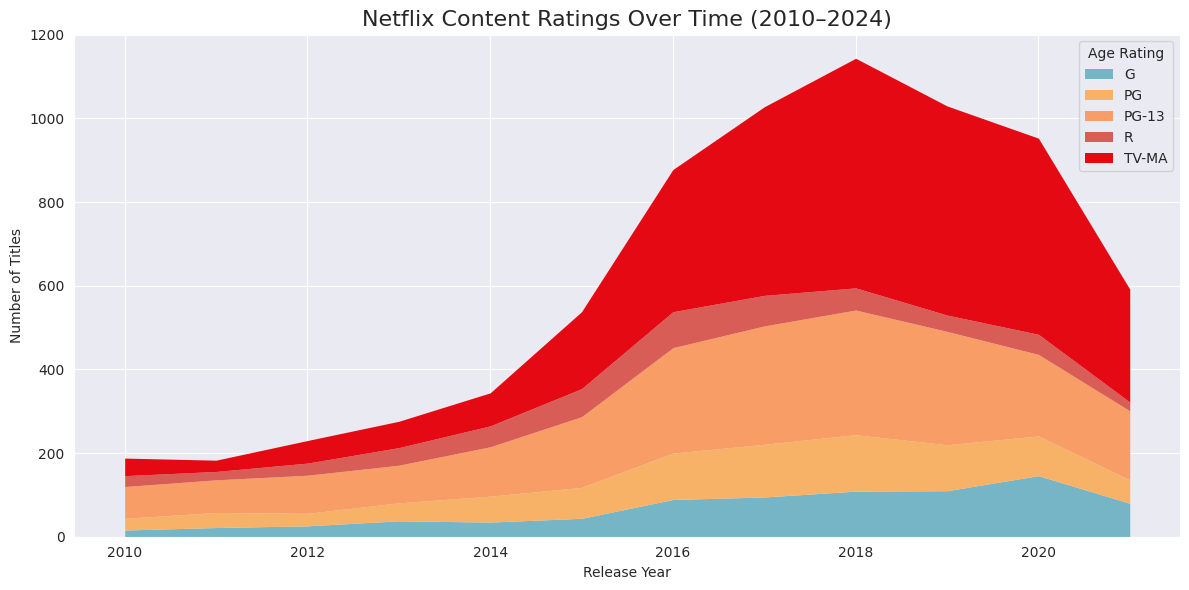

In [22]:
# 🎨 Section 6: Plotting - Stacked Area Chart
rating_by_year.plot.area(
    color=["#76b5c5", "#f7b267", "#f79d65", "#d85d56", "#e50914"],  # Netflix-themed
    linewidth=0,
)


plt.title("Netflix Content Ratings Over Time (2010–2024)", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Age Rating")
plt.tight_layout()
plt.show()

# 📌 Section 7: Interpretation
"""
We observe a significant rise in TV-MA content after 2015, suggesting a deliberate
shift towards adult-oriented shows. The number of family-friendly titles (G/PG)
remains relatively flat, while mature content (TV-MA, R) now dominates the catalog.
"""

# 📊 Chart 2: Composition of Age Ratings Over Time (Normalized Stacked Bar)
# -------------------------------------------------------------------------
"""
While the absolute number of titles increased, the composition of age categories
has also shifted significantly. This chart shows the *proportion* of each rating
per year, highlighting how the catalog matured structurally.
"""

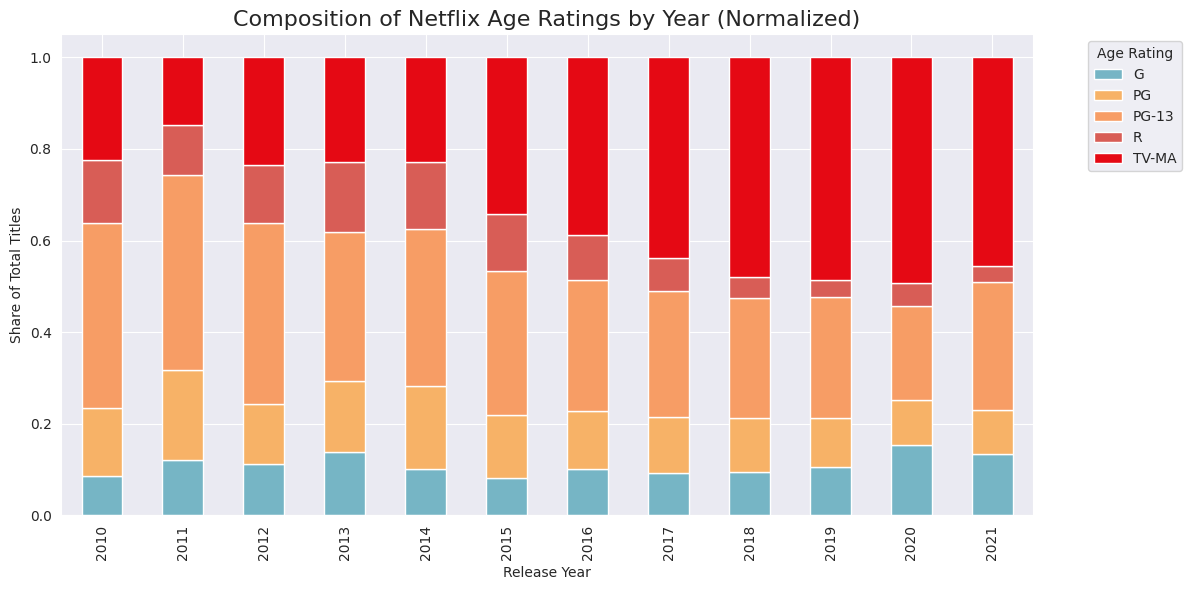

In [23]:
# 🧮 Prepare normalized data for Chart 2
rating_by_year_norm = rating_by_year.div(rating_by_year.sum(axis=1), axis=0)


# 🎨 Plotting - Normalized Stacked Bar Chart (Chart 2)
rating_by_year_norm.plot(
kind="bar",
stacked=True,
color=["#76b5c5", "#f7b267", "#f79d65", "#d85d56", "#e50914"]
)


plt.title("Composition of Netflix Age Ratings by Year (Normalized)", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Share of Total Titles")
plt.legend(title="Age Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 📌 Section 8: Interpretation (Chart 2)
"""
This normalized chart confirms the trend: mature-rated content (especially TV-MA)
has become the majority share of Netflix releases in recent years. Family content,
on the other hand, has decreased proportionally, even if the raw count stayed flat.
"""

# 🎭 Chart 3: Minimum Age Rating per Genre (Heatmap)
# --------------------------------------------------
"""
Genres target different audiences — while some categories like Animation or Kids
skew toward younger ratings, others like Drama and Horror cater to mature viewers.
This heatmap shows the distribution of minimum age categories by genre.
"""

In [12]:
# 📊 Preprocess genre and rating combination
# Use the first listed genre and map its ratings
df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()


# Filter out rows with missing genres or simplified ratings
genre_rating = df[df['main_genre'].notna() & df['simple_rating'].notna()]


# Create a crosstab of genre × rating
genre_rating_crosstab = pd.crosstab(
genre_rating['main_genre'],
genre_rating['simple_rating'],
normalize='index'
)

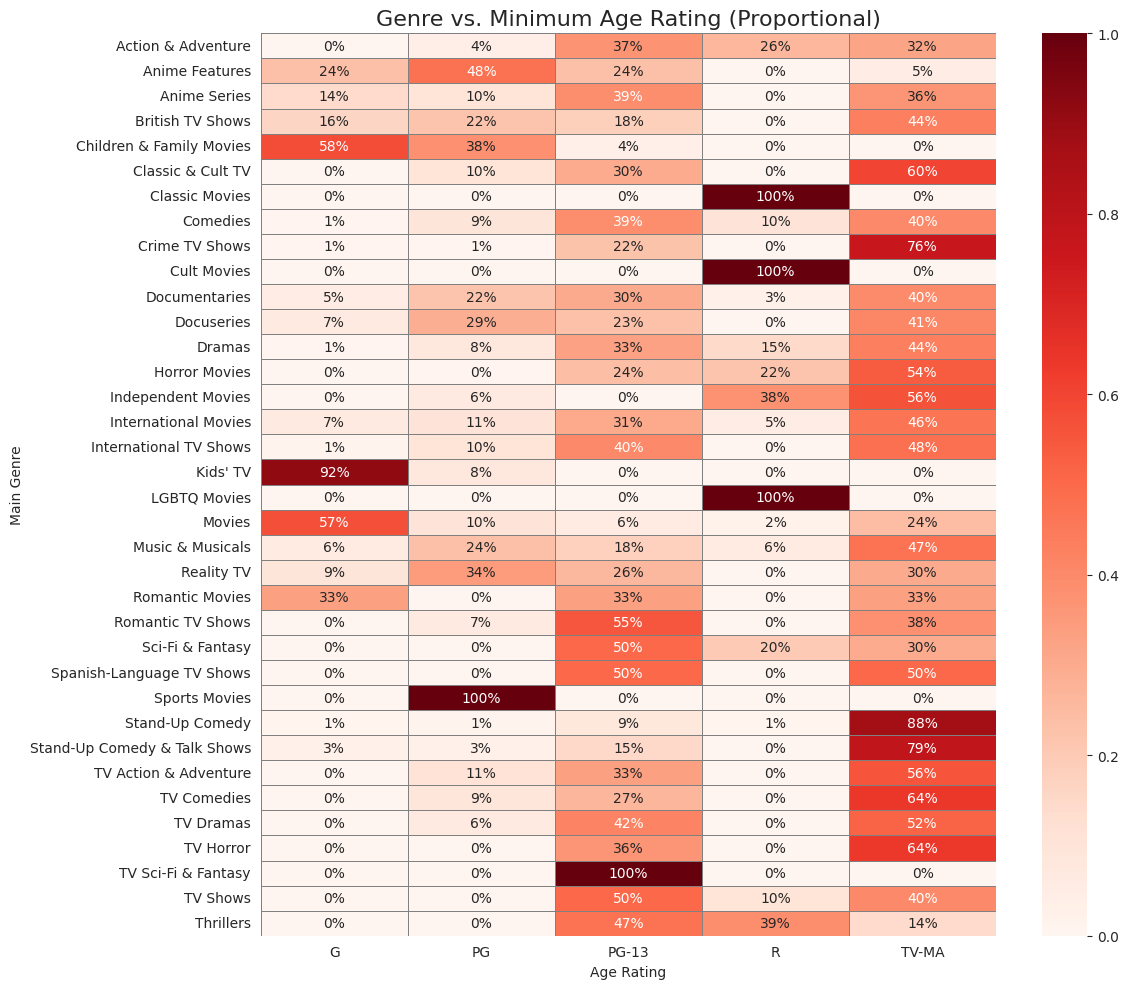

In [24]:
# Reorder columns to match rating_order
genre_rating_crosstab = genre_rating_crosstab[rating_order]


# 🎨 Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
genre_rating_crosstab,
cmap="Reds",
annot=True,
fmt=".0%",
linewidths=0.5,
linecolor='gray'
)


plt.title("Genre vs. Minimum Age Rating (Proportional)", fontsize=16)
plt.xlabel("Age Rating")
plt.ylabel("Main Genre")
plt.tight_layout()
plt.show()


**Legend – Netflix Age Ratings:**

- **G** = General Audiences  
- **PG** = Parental Guidance Suggested  
- **PG-13** = Parents Strongly Cautioned  
- **R** = Restricted (17+)  
- **TV-MA** = Mature Audiences Only


# 📌 Section 9: Interpretation (Chart 3)
"""
Genres like Horror, Drama, and Thrillers are dominated by TV-MA ratings,
while Animation, Kids, and Family genres cluster around G and PG.
This confirms that genre choice directly shapes the intended audience maturity.
"""